# Group 21 Project Report

## Introduction

Heart disease is one of the leading causes of death in Canada. It encompasses all kinds of heart conditions such as coronary heart disease, heart defects, and arrythmia’s (irregularity in heartbeat). To better understand heart disease, it is important to look at the key factors that influence an individual’s risk of having this condition. In this project we will be looking at five different factors that have a correlation with heart disease. These factors are cholesterol, maximum heart rate, sex, age, and chest pain. These will be used as predictors in this project.

So how are each of these  predictors associated with heart disease? Based on scientific literature, high blood pressure places extra exertion on blood vessels, increasing tension on the arteries, which decreases blood flow to major organs and oxygen to the heart. Aside from this, people who have high levels of cholesterol could have fat deposits build up in the arteries, making it  challenging for blood to flow freely through the body. Additionally, regarding maximum heart rate, reaching the ideal heart rate range can indicate a healthy heart in good condition. If it exceeds a healthy range, the maximum heart rate of a patient can be used as an indicator of a potential heart issue. A common factor in many kinds of diseases is an increase in age, which is often correlated with a higher risk for heart disease. Lastly, incidence of chest pain can be a risk factor for heart disease if evaluated at abnormal levels. The data base classifies the chest pain type by typical chest pain (angina), atypical angina, no chest pain, and asymptomatic.

The question we want to answer is: are we able to predict whether a patient has heart disease based on their health profile? 

The information used to answer this question will be from the heart disease dataset, and used to create an accurate prediction model to classify new data. The heart disease data set encompasses 14 factors, in which five of them will be used as predictors and diagnosis of heart disease is what we will be predicting.

## Methods

To answer our research question, we used the heart disease data collected from the Cleveland hospital. Initially, cholesterol levels (chol), resting blood pressure (trestbps), age (age), chest pain (cp), and maximum heart rate (thalach) are the five variables that were used as the predictors in our classification model, due to their aforementioned strong association with heart disease. We used the K-nearest neighbors classification algorithm to predict the presence of heart disease, denoted the “predicted attribute” in our code, which we have simplified to a binary factor that indicates its presence or absence, denoted as "Positive" or "Negative" respectively. For our preliminary exploratory data analysis, we summarized the Cleaveland hospital data into a data frame that grouped the patient data by their respective sex (male or female) and heart condition (Positive or Negative for heart disease) in order to calculate the mean values of three quantifiable predictors: cholesterol, resting blood pressure, and maximum heart rate. This was done to see if patients with heart disease tend to have higher mean values of the aforementioned variables, before visualizating the data.

These mean values revelead that a higher maximum heart rate does not necessarily lead to heart disease, as the maximum heart rate achieved in positive patients was actually lower than the mean value in negative patients, which is contrary to our expectations. To visualize this trend, a histogram that expressed the distribution of patients with varying maximum heart rates was created, which reinforced the notion that a higher maximum heart rate was not measured in patients with heart disease, as positive cases had a heart rate distribution that was skewed lower compared to negative cases (reaffirmed by a lower median). Likewise, analyzing the mean and median values of cholesterol levels revealed that positive cases had slightly higher distributions of cholesterol levels, which was expected based on literature. To better understand the age demographic of this data set, we calculated the mean age of the patients, which were grouped seperately by their heart condition (whether positive or negative for heart disease). While the mean and median ages were similar (around the mid 50's range), our summary data frame revealed that the positive cases recorded in this data set had a slightly higher mean and median age, meaning the positive patients were slightly older than the negative ones on average. This observation aligns with literature, which cites that older age is often linked to heart disease.

To visualize and analyze chest pain as a predictor, we created a bar graph quantifying the number of patients with varying levels of chest pain, 1 corresponding to typical, 2 to atypical, 3 to no pain, and 4 to asymptomatic. Profoundly, this showed that asymptomatic chest pain was associated with positive cases, while the remaining levels of chest pain were mostly found in negative patients. However, grouping by sex revealed that there were differences between males and females in their resting blood pressure, cholesterol levels, and maximum heart rate, suggesting that it may a valuable predictor to add to our model. Regarding the resting blood pressure (trestbps), our summary data of the mean and median blood pressure between positive and negative cases revealed that blood pressure did not appreciably affect the incidence of heart disease, since the medians and means were almost indentical, and were centered similarily on our blood pressure histogram. As such, contrary to our original approach, we believed that blood pressure would not be a useful predictor in our model, and was removed before proceeding further. Altogether, exploratory data analysis resulted in the inclusion of sex into our model, replacing resting blood pressure, leaving our five predictors as age (age), sex (sex), chest pain (cp), maximum heart rate (thalach), and cholesterol (chol).

To begin constructing our model, we started by splitting our data into a training and a testing set. 75% of the total data was used as training data, while the remaining 25% was used as testing data -- set aside and untouched. Our training set was further subdivided into training and validation sets by virtue of five fold cross-validation; this was done to increase the accuracy of our prediction by determining the optimal K value to tune our model, without using our testing data. We then created our recipe which included the five aforementioned predictors: age, sex, chest pain, maximum heart rate, and cholesterol -- with all predictors scaled and centered to achieve equal weighting. We then created our model specification that employed K-nearest neighbors by calculating the straight-line distance with an array of K values from 1-60. Both the model and recipe were passed into our workflow to collect accuracy metrics on our different K values, which we analyzed to select the optimal K value. Determining the optimal K value for our model was done by creating a visualization that plotted accuracy against the K values of 1 through 60. From the plot, we determined that the optimal K value was 52, since the graph plateaus between 50-55, and occurs at the second highest accuracy peak in the graph (the first peak at K = 5 was too narrow, and thus ignored). Using K = 52 in our model yielded an accuracy of 82.67%, as observed in our accuracy metrics data frame.

Finally, to visualize our model, we created a scatter plot that illustrated the correlation between cholesterol and maximum heart rate, which where two predictors that we studied extensively during our exploratory data analysis. The points were gathered from our testing data set and were coloured based on the presence of heart disease in each patient, which is indicated in our corresponding plot legend. Additionally, our test predictions from our model were then overlayed over the points using a two-dimensional density plot to show the regions that our model predicted in reference to the actual testing data (with real diagnoses), as well as the density of our predictions based on the maximum heart rate and cholesterol levels of a given patient. In general, the graph reveals that a lower maximum heart rate correlated with positive cases, which does not align with our original hypothesis. Similarily, it appears that having higher serum cholesterol levels does not lead to a positive classification for heart disease, and was seemingly uninfluential. 

In [58]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

In [59]:
# Set the seed
set.seed(4)

# Reading, Cleaining, and Wrangling

# Reading in the Cleaveland Heart Disease data
rd <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
             col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","the_predicted_attribute"))

# Selecting the five initial predictors
HD_selected<-select(rd,age,sex,trestbps,chol,thalach,cp,the_predicted_attribute)

# Mutating the data to convert the "predicted attribute", or incidence of heart disease, into a binary factor of either "Positive" for presence, or "Negative" for absence
HD_mutated <-HD_selected%>%
            mutate(the_predicted_attribute=ifelse(the_predicted_attribute==0,"Negative","Positive"))%>%
            mutate(the_predicted_attribute=as.factor(the_predicted_attribute))

paste("Cleaveland Heart Disease Data (clean)")
HD_mutated

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  the_predicted_attribute = col_double()
)



[1] "Cleaveland Heart Disease Data (clean)"

age,sex,trestbps,chol,thalach,cp,the_predicted_attribute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,1,Negative
67,1,160,286,108,4,Positive
67,1,120,229,129,4,Positive
37,1,130,250,187,3,Negative
41,0,130,204,172,2,Negative
56,1,120,236,178,2,Negative
62,0,140,268,160,4,Positive
57,0,120,354,163,4,Negative
63,1,130,254,147,4,Positive


In [60]:
# Summarizing data for exploratory analysis

# Data frame used to show difference in sex and unforseen thalach observation
HD_summarize <- HD_mutated %>%
                group_by(sex,the_predicted_attribute)%>%
                summarize(mean(chol),mean(thalach),mean(trestbps))%>%
                mutate(sex=ifelse(sex==1,"Male","Female"))

# Data frame used to show similar median/mean to justify removing trestbps
HD_summarize_2 <- HD_mutated %>%
                group_by(the_predicted_attribute) %>%
                summarize(mean=mean(trestbps),median=median(trestbps))

# Data frame used to observe the slight skew in higher cholesterol levels for positive cases
HD_summarize_3 <- HD_mutated %>%
                group_by(the_predicted_attribute)%>%
                summarize(mean=mean(chol),median=median(chol))

# Data frame used to find the mean age in the data set
HD_summarize_4 <- HD_mutated %>%
                group_by(the_predicted_attribute)%>%
                summarize(mean=mean(age),median=median(age))

# Printing out data frames for exploratory data analysis
HD_summarize
paste("Fig 1.0: Mean values of cholesterol (chol), maximum heart rate (thalach), and resting blood pressure (trestbps)")
HD_summarize_2
paste("Fig 1.1: Median and mean resting blood pressure (trestbps)")
HD_summarize_3
paste("Fig 1.2: Median and mean cholesterol (chol)")
HD_summarize_4
paste("Fig 1.3: Median and mean age (age)")

`summarise()` regrouping output by 'sex' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



sex,the_predicted_attribute,mean(chol),mean(thalach),mean(trestbps)
<chr>,<fct>,<dbl>,<dbl>,<dbl>
Female,Negative,256.7500,154.0278,128.7361
Female,Positive,276.1600,143.1600,146.6000
Male,Negative,231.5978,161.7826,129.6522
Male,Positive,246.0614,138.4035,131.9298


[1] "Fig 1.0: Mean values of cholesterol (chol), maximum heart rate (thalach), and resting blood pressure (trestbps)"

the_predicted_attribute,mean,median
<fct>,<dbl>,<dbl>
Negative,129.2500,130
Positive,134.5683,130


[1] "Fig 1.1: Median and mean resting blood pressure (trestbps)"

the_predicted_attribute,mean,median
<fct>,<dbl>,<dbl>
Negative,242.6402,234.5
Positive,251.4748,249.0


[1] "Fig 1.2: Median and mean cholesterol (chol)"

the_predicted_attribute,mean,median
<fct>,<dbl>,<dbl>
Negative,52.58537,52
Positive,56.62590,58


[1] "Fig 1.3: Median and mean age (age)"

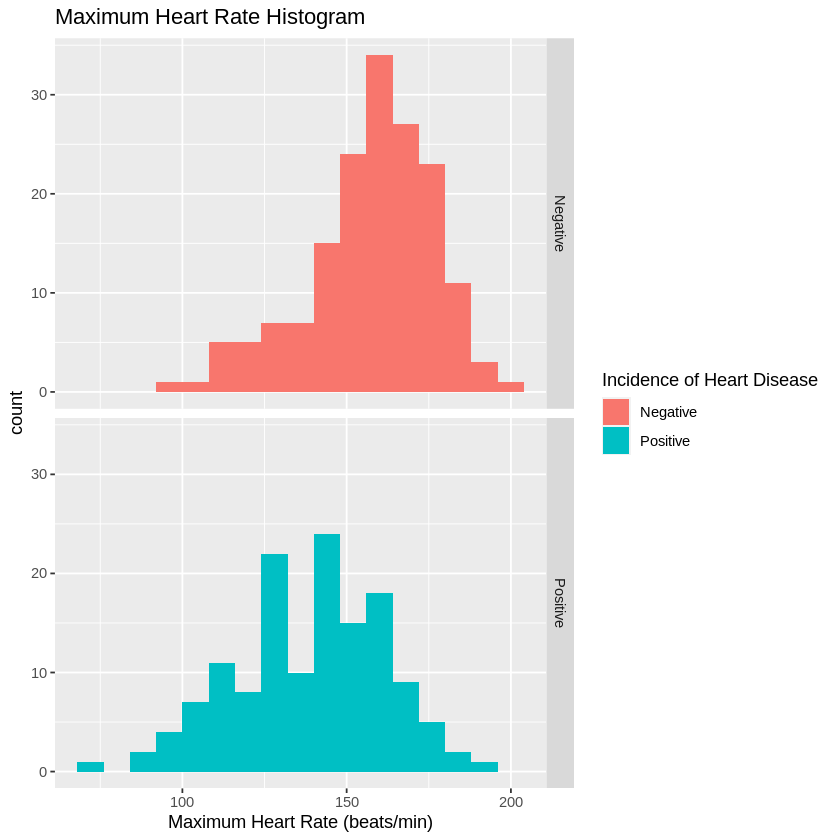

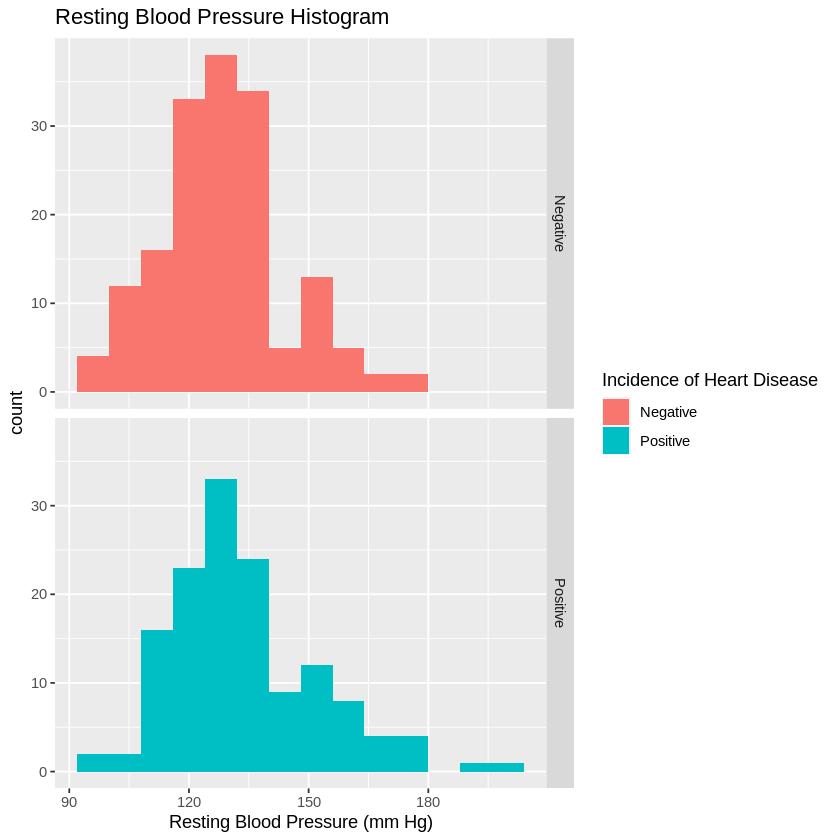

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



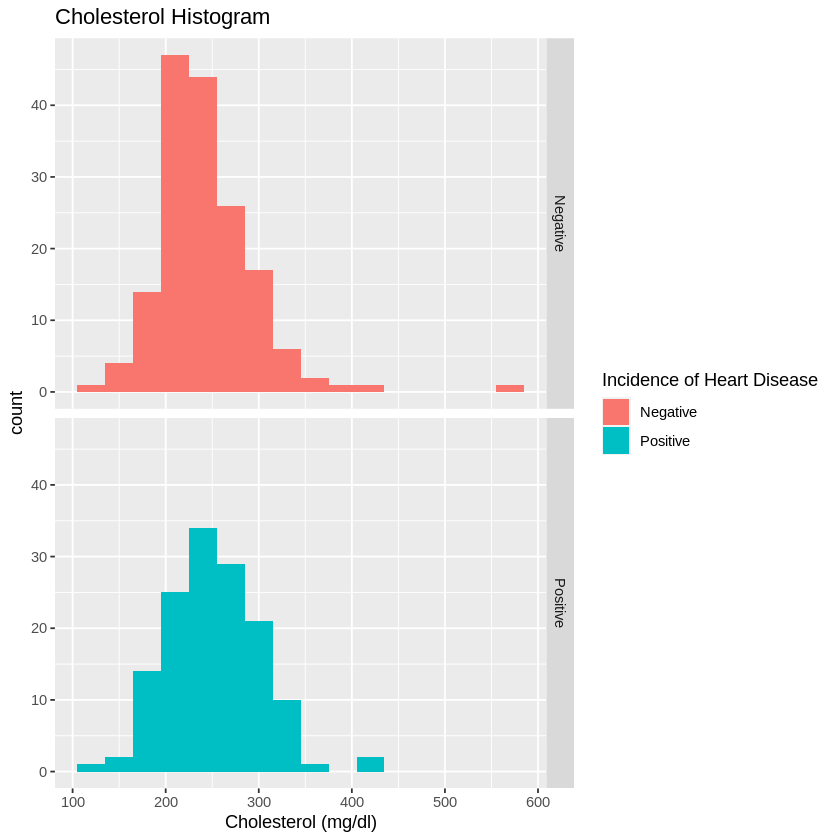

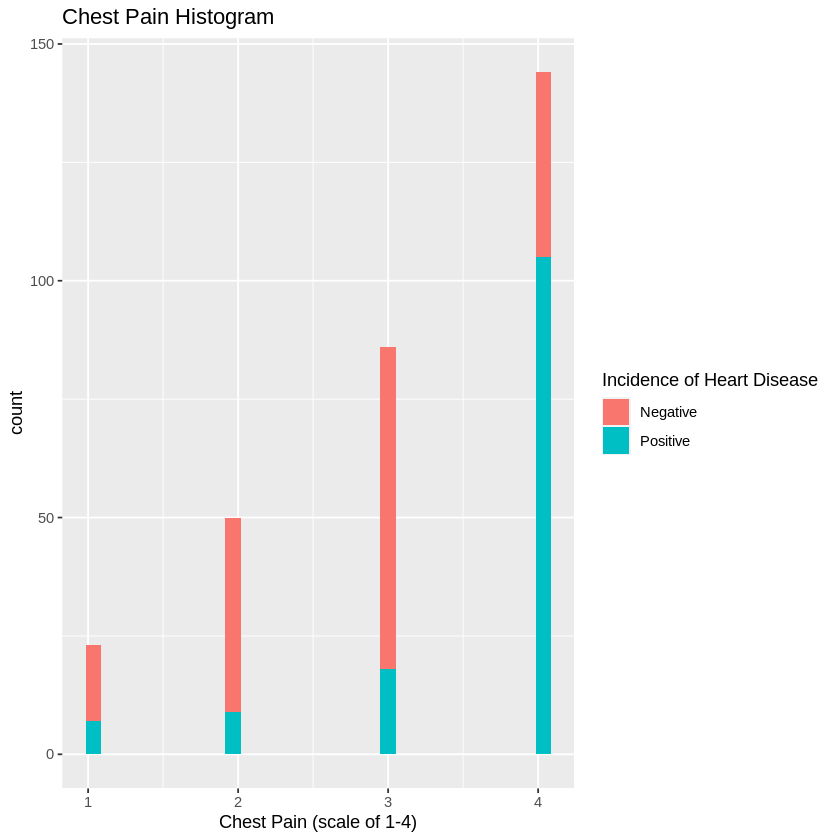

In [61]:
# Plot used to visualize thalach
thalach_plot <- ggplot(HD_mutated,aes(x=thalach,fill=the_predicted_attribute))+
                    geom_histogram(binwidth = 8) +
                    facet_grid(rows = vars(the_predicted_attribute)) +
                    labs(x = "Maximum Heart Rate (beats/min)", fill = "Incidence of Heart Disease") +
                    ggtitle("Maximum Heart Rate Histogram")

# Plot used to visualize trestbps
trestbps_plot <- ggplot(HD_mutated,aes(x=trestbps,fill=the_predicted_attribute))+
                    geom_histogram(binwidth = 8) +
                    facet_grid(rows = vars(the_predicted_attribute)) +
                    labs(x = "Resting Blood Pressure (mm Hg)", fill = "Incidence of Heart Disease") +
                    ggtitle("Resting Blood Pressure Histogram")

# Plot used to visualize cholesterol
chol_plot <- ggplot(HD_mutated,aes(x=chol,fill=the_predicted_attribute))+
                geom_histogram(binwidth = 30) +
                facet_grid(rows = vars(the_predicted_attribute)) +
                labs(x = "Cholesterol (mg/dl)", fill = "Incidence of Heart Disease") +
                ggtitle("Cholesterol Histogram")

# Plot used to visualize chest pain
cp_plot <- ggplot(HD_mutated,aes(x = cp,fill = the_predicted_attribute))+
                geom_histogram() +
                labs(x = "Chest Pain (scale of 1-4)", fill = "Incidence of Heart Disease") +
                ggtitle("Chest Pain Histogram")

# Printing out plots
thalach_plot
trestbps_plot
chol_plot
cp_plot

.pred_class,age,sex,trestbps,chol,thalach,cp,the_predicted_attribute
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Positive,67,1,120,229,129,4,Positive
Negative,41,0,130,204,172,2,Negative
Negative,57,0,120,354,163,4,Negative
Positive,53,1,140,203,155,4,Positive
Negative,58,1,120,284,160,2,Positive
Positive,40,1,110,167,114,4,Positive
Positive,60,1,117,230,160,4,Positive
Negative,65,0,140,417,157,3,Negative
Positive,65,1,120,177,140,4,Negative


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8266667


[1] "Fig 2.0: Accuracy metrics for tuned model"

          Truth
Prediction Negative Positive
  Negative       37        9
  Positive        4       25

[1] "Fig 2.1: Confusion matrix for tuned model"

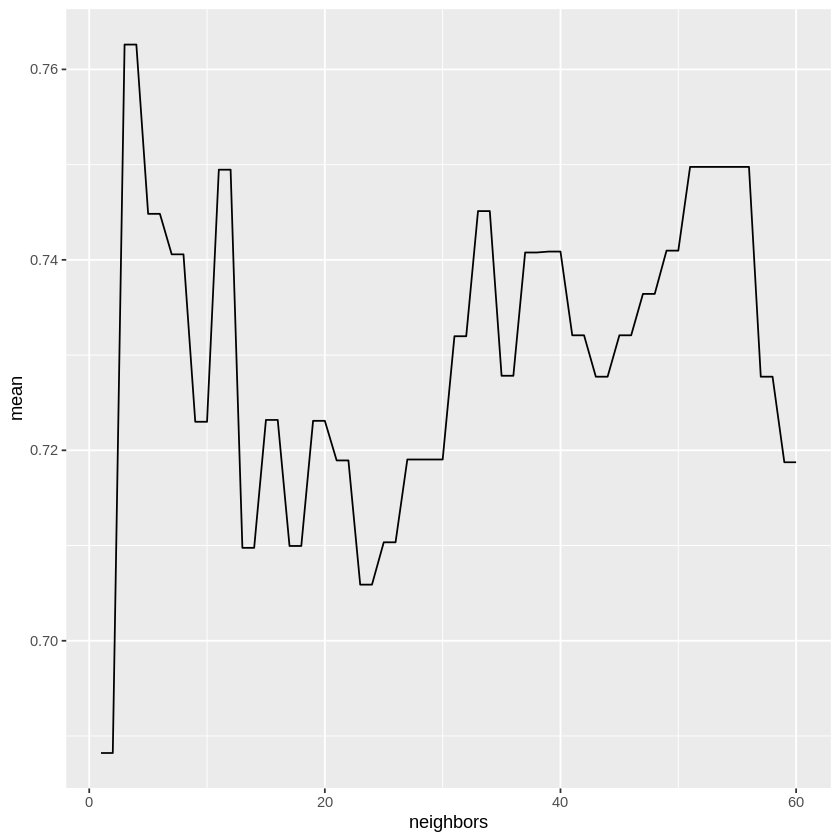

In [62]:
# Set the seed
set.seed(4)

# Classification Model 

# Training/Test split
HD_split <- initial_split(HD_mutated, prop = 3/4, strata = the_predicted_attribute)  
HD_train <- training(HD_split)   
HD_test  <- testing(HD_split)

# 5 fold cross-validation
HD_vfold<-vfold_cv(HD_train, v = 5, strata = the_predicted_attribute)

# Recipe
HD_recipe<-recipe(the_predicted_attribute ~age+sex+thalach+chol+cp, data=HD_train) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

# Model specification (tuning)
HD_spec<- nearest_neighbor(weight_func ="rectangular" , neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("classification")

# Workflow
HD_fit <- workflow() %>%
       add_recipe(HD_recipe) %>%
       add_model(HD_spec) %>%
       tune_grid(resamples = HD_vfold, grid = tibble(neighbors = seq(from = 1, to = 60))) %>%
       collect_metrics()

# Accuracy metrics to pick optimal K
accuracy_graph<-HD_fit%>%
        filter(.metric=="accuracy")%>%
        ggplot(aes(x=neighbors,y=mean))+
        geom_line()
accuracy_graph

# Recreating model specification with optimal K
HD_best_spec<- nearest_neighbor(weight_func ="rectangular" , neighbors = 52) %>%
       set_engine("kknn") %>%
       set_mode("classification")

# Fitting the model with optimal K (same recipe, new model specification)
HD_best_fit <- workflow() %>%
       add_recipe(HD_recipe) %>%
       add_model(HD_best_spec) %>%
       fit(data=HD_train)

# Predicting
HD_test_predictions<-predict(HD_best_fit,HD_test)%>%
            bind_cols(HD_test)
HD_test_predictions

# Prediction accuracy and confusion matrix
HD_prediction_accuracy <- HD_test_predictions %>%
         metrics(truth = the_predicted_attribute, estimate = .pred_class) %>%
         filter(.metric == "accuracy")
HD_prediction_accuracy
paste("Fig 2.0: Accuracy metrics for tuned model")

HD_confusion_matrix <- conf_mat(HD_test_predictions,truth = the_predicted_attribute, estimate = .pred_class)
HD_confusion_matrix
paste("Fig 2.1: Confusion matrix for tuned model")

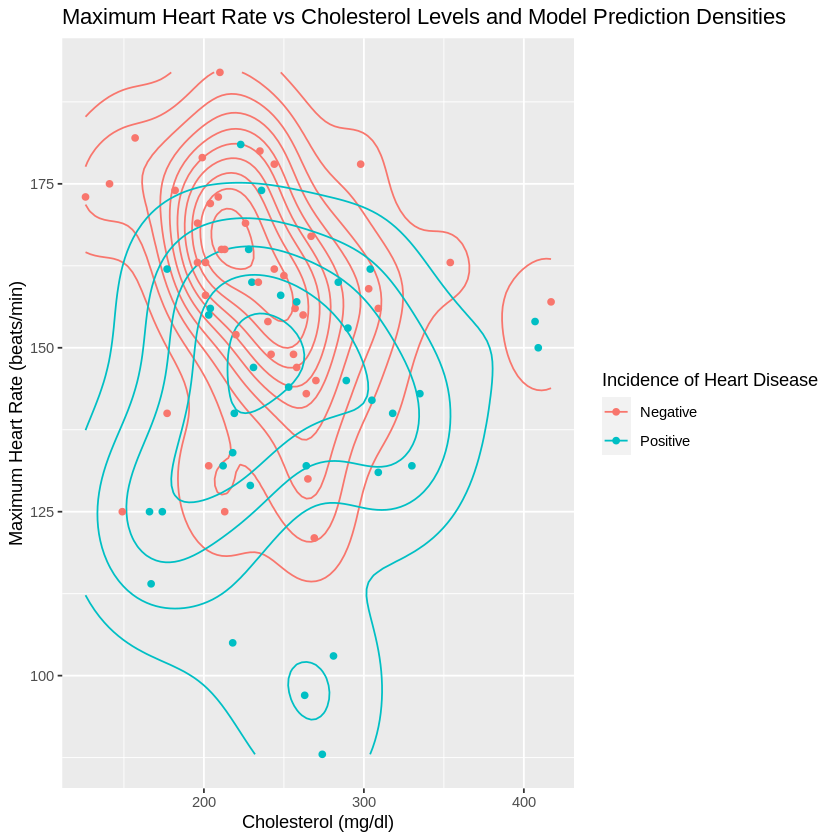

In [63]:
# Final visualization for data analysis 

graph_analysis <- HD_test %>%
                ggplot()+
                geom_density_2d(data= HD_test_predictions,aes(x=chol,y=thalach, color= .pred_class))+
                geom_point(data= HD_test ,aes(x=chol,y=thalach, color = the_predicted_attribute))+
                labs(x = "Cholesterol (mg/dl)", y = "Maximum Heart Rate (beats/min)", color = "Incidence of Heart Disease") +
                ggtitle("Maximum Heart Rate vs Cholesterol Levels and Model Prediction Densities")
graph_analysis

## Discussion

In our proposal, we expected to find positive correlations between heart disease and cholesterol, resting blood pressure, and maximum heart rate, since these indications are linked to heart disease in scientific literature. While we observed a positive correlation between the presence of heart disease and cholesterol during our exploratory data analysis, we also found that the correlation between heart rate and heart disease is in fact negative. Individuals with no heart disease have a higher maximum heart rate compared to the patients, which contradicted our previous expectations. Moreover, we did not find any correlation between resting blood pressure and the presence of heart disease. For positive and negative patients, the data distribution of resting blood pressure is almost identical, which is also the reason we decided to remove this predictor from our model. The effect of sex is also unexpected. In our dataset, we found that males and females have different mean values of their blood pressure, cholesterol levels and maximum heart rate, controlling the presence of heart disease. Therefore, we believe sex is correlated to heart disease and should be used as a predictor. With cholesterol, maximum heart rate, age, sex and chest pain level as the predictors, our model has an accuracy of 82.67% when using K = 52, which we determined to be the optimal K value based on our accuracy plot.

In our final visualization, we plotted the original testing data (which was set aside at the beginning of the data analysis) as a scatter plot with cholesterol and maximum heart rate as our variables to study, as well as our model's predictions as a two-dimensional density plot. The overlap in density regions of our positive and negative model predictions demonstrate that our model has some deficiencies in accurately predicting the presence of heart disease in a given patient, but there also remains some ambiguity in the testing data (due to the lack of separation between positive and negative cases; the "clumpiness" of the scatter points). This shows that even in the testing data, cholesterol and maximum heart rate are not the sole determinants of heart disease; it is likely a combination of factors on a case-by-case basis that allows medical professionals to diagnose a patient with heart disease.

Since many of the predictors that we expected to display a strong positive correlation with heart disease did not, we suggest that there are certainly other unknown factors at play, which would influence a patient's diagnosis of heart disease. There is also the possibility that our data set is too small to accurately display the hypothesized relationship. Especially when considering the fact that we used data that came from one location. It's possible that in Cleveland the major factor influencing heart disease is cholesterol and the other factors may not be significant enough to display a proper relationship with heart disease.

These findings are important to inform the general public on potential risk factors for heart disease, serving as preventive knowledge. Individuals with high cholesterol and abnormal levels of chest pain should be aware of the risk for heart disease and should seek medical attention for further guidance. This can be applied to the population in Cleveland because we only used data from the Cleveland hospital. This model can be used to determine the risk factors the general public should be aware of in various locations or worldwide by using different data sets with these predictors. Variables in our project such as maximum heart rate, which demonstrate an unexpected negative correlation with heart disease, should be studied to better understand maximum heart rates' role in heart disease diagnosis. The effects of sex and age should also be considered.

Future data analysis should apply this model to larger and different datasets, and determine whether our findings can be applied to rare or more extreme cases of heart disease. Cases of heart defects and attacks may have less severe symptoms but are still classified as or result in heart disease. The predictors used in this project could aid in determining whether someone has a heart disease even if the type of heart disease is undiagnosed.


## References

Aha, D. (2019). Heart Disease Data Set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/citation_policy.html 

Lennep, J., Westerveld, H., Erkelens, D., & Van der Wall, E. (2002). Risk factors for coronary heart disease: implications of gender. Cardiovascular Research. 53(3). 538-549.  https://doi.org/10.1016/S0008-6363(01)00388-1

Thayer, J., Yamamoto, S., & Brosschot, J. (2010). The relationship of autonomic imbalance, heart rate variability and cardiovascular disease risk factors. Internal Journal of Cardiology, 141(2). 122-131. https://doi.org/10.1016/j.ijcard.2009.09.543